In [ ]:
from google.colab import drive
drive.mount('/content/drive')

CSV limpio guardado exitosamente.


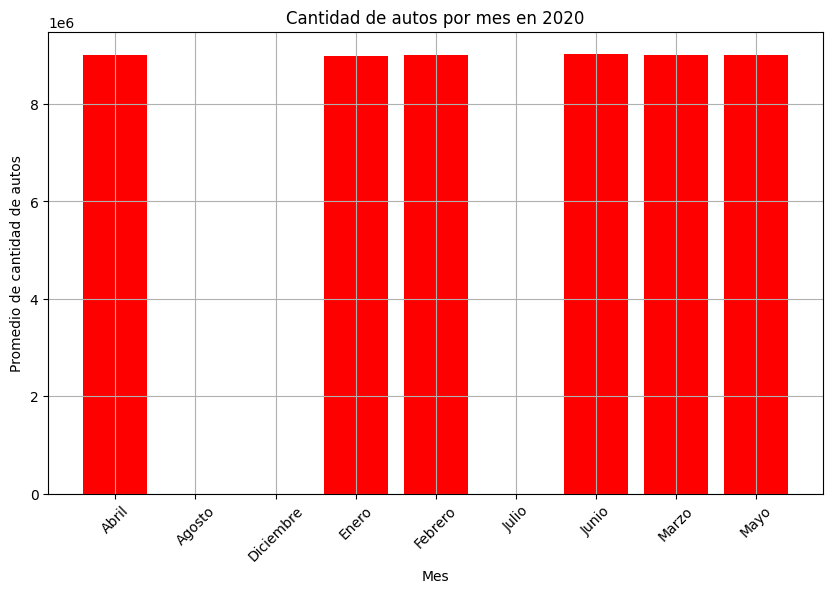

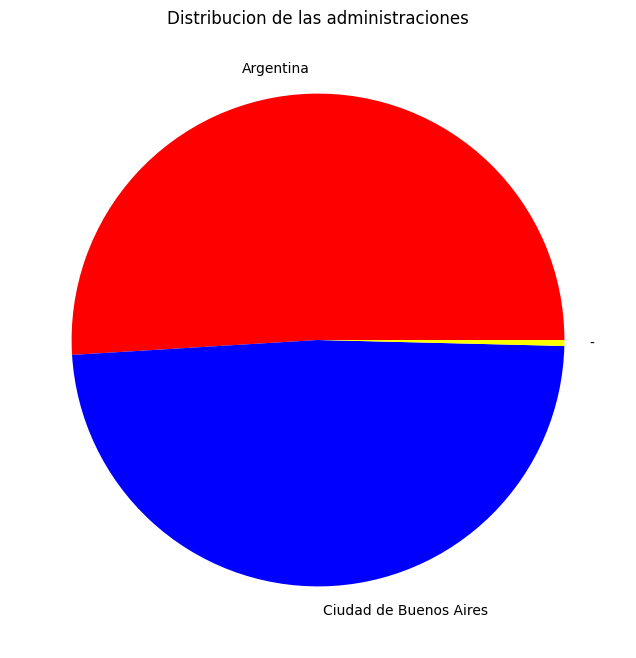

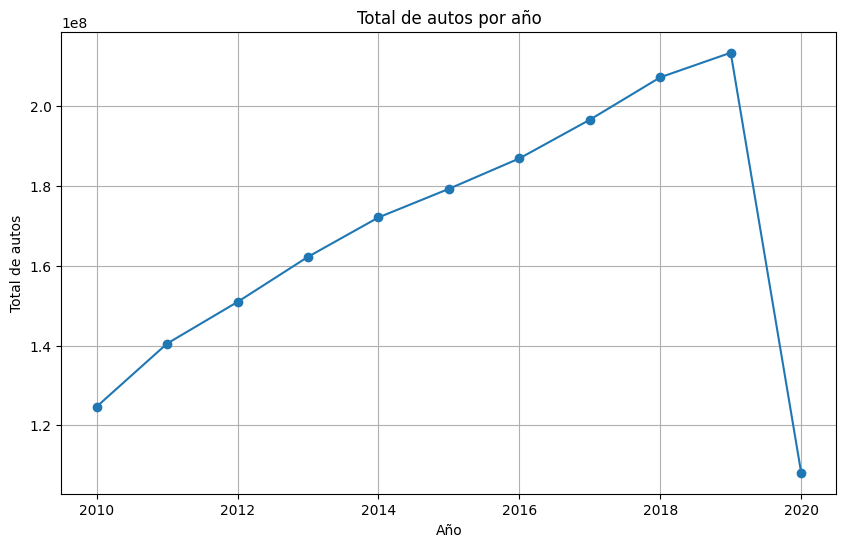

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def arreglar_columnas(columnas):
    for i in range(len(columnas)):
        columnas[i] = columnas[i].replace(" ","")
    return columnas

def resolver_espacios(valor):
    valor = str(valor)
    if valor[0] == ' ':
        valor = valor[1:]
    if valor == '':
        valor = "-"
    return valor

def comprobarMes(mes):
    meses_del_anio = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
                      "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
    if mes.capitalize() in meses_del_anio:
        return mes.capitalize()
    else:
        return np.nan

def comprobarAdministracion(administracion):
    if administracion.capitalize() == "Ciudad de buenos aires":
        return "Ciudad de Buenos Aires"
    elif administracion.capitalize() == "Argentina":
        return "Argentina"
    else:
        return "-"

def manejarNulos(dataframe):
    return dataframe.dropna()

def manejarDatosIncorrectos(dataframe):
    dataframe.loc[~dataframe['administración'].isin(["Ciudad de Buenos Aires", "Argentina"]), 'administración'] = '-'
    return dataframe

csv = pd.read_csv("/content/CSVTRABAJO.csv")

csvColumnas = list(csv.columns)
csv.columns = arreglar_columnas(csvColumnas)

csv = csv.applymap(resolver_espacios)

csv["mes"] = csv["mes"].apply(comprobarMes)

csv["administración"] = csv["administración"].apply(comprobarAdministracion)

csv = manejarNulos(csv)

csv = manejarDatosIncorrectos(csv)

csv.to_csv('/content/datos_limipios.csv', index=False)

print("CSV limpio guardado exitosamente.")

# graficos

csv = pd.read_csv("/content/datos_limipios.csv")

# grafico 1 de barras, autos por mes en 2020

data_2020 = csv[csv['año'] == 2020]
promedio_por_mes = data_2020.groupby('mes')['cantidad_vehículos'].mean()

plt.figure(figsize=(10, 6))
plt.bar(promedio_por_mes.index, promedio_por_mes.values, color='red')
plt.title('Cantidad de autos por mes en 2020')
plt.xlabel('Mes')
plt.ylabel('Promedio de cantidad de autos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# grafico 2 de administracione (pastel)
administracion = csv['administración'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(administracion.values, labels=administracion.index, colors=['red', 'blue',"yellow"])
plt.title('Distribucion de las administraciones')
plt.show()

# grafico 3 de administracione (lineas)
total_autos_por_año = csv.groupby('año')['cantidad_vehículos'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_autos_por_año.index, total_autos_por_año.values, marker='o', linestyle='-')
plt.title('Total de autos por año')
plt.xlabel('Año')
plt.ylabel('Total de autos')
plt.grid(True)
plt.show()

Se pueden distinguir 3 graficos, el primero es uno que muestra la cantidad de autos por mes en el año de 2020, podemos observar que en Agosto, Julio y Diciembre no hay datos, ya que no se ven datos en el CSV.
En el segundo grafico observamos un grafico de tipo pastel en el que vemos que tanto representan las administraciones en Cantidad, en este caso como solo hay 2 se ven casi iguales.
Y en el tercer grafico vemos un grafico de lineas en el que se ve el promedio de autos por año, desde 2010 a 2020, donde se ve una gran decadencia en 2020 por los nAn.